# Navigation - Solution

---

In this notebook, we train a deep reinforcement learning agent using a deep Q-network to solve the Navigation Unity environment. The objective is to pick-up yellow bananas and avoid blue ones.

## Import packages

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from dqn_agent import Agent
from collections import deque
import torch
import matplotlib.pyplot as plt

### 1. Start the Environment

In [2]:
env = UnityEnvironment(file_name="Banana.app")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
state = env_info.vector_observations[0]
state_size = len(state)

### 2. Create the deep Q-network function

In [4]:
def dqn(agent, n_episodes=3000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.997, train=True):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps if train else 0.0)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            if train:
                agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=14.0 and train:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_navDQN.pth')
            break
    return scores

## 3. Train the agent

Episode 100	Average Score: 1.31
Episode 200	Average Score: 5.14
Episode 300	Average Score: 8.44
Episode 400	Average Score: 11.34
Episode 500	Average Score: 12.96
Episode 544	Average Score: 14.05
Environment solved in 444 episodes!	Average Score: 14.05


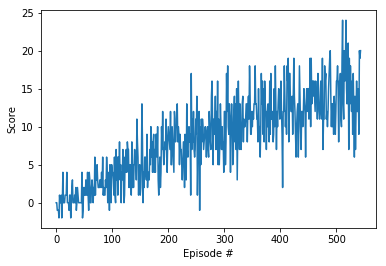

In [5]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0)
scores = dqn(agent)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

The above plot shows that at the end of training the agent attained an average score of 14.05 over 100 episodes and the environment was solved in 444 episodes.

## Run the trained agent

In [6]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0, filename='checkpoint_navDQN.pth')
scores = dqn(agent, n_episodes=100, train=False)

Episode 100	Average Score: 12.23


In [7]:
env.close()